# Inspecting directional data in a MagIC contribution using PmagPy

Let's have a look at a MagIC contribution that is a typical directional data set. This study by Nicole Behar and coauthors focused on lava flows from the Plio-Pleistocene Golan Heights.

> Behar, N., Shaar, R., Tauxe, L., Asefaw,
H., Ebert, Y., Heimann, A., et al. (2019).
Paleomagnetism and paleosecular
variations from the Plio‐Pleistocene
Golan Heights volcanic plateau, Israel.
Geochemistry, Geophysics, Geosystems,
20 https://doi.org/10.1029/2019GC008479

A way that we can readily search for a contribution on MagIC is using the study doi. Let's go check out the contribution on the MagIC website:

https://earthref.org/MagIC/doi/10.1029/2019GC008479

## Analyzing and visualizing the data

We want to be able to get the data from MagIC, import the data into our notebook, and have a look at it.

To start with, let's import some functions from PmagPy:

In [1]:
import pmagpy.ipmag as ipmag
%matplotlib inline
%config InlineBackend.figure_format='retina'

## Import the data

We can use ipmag to go download the data from MagIC for us. We can do this in a couple of ways. One way is to use the doi and the function ```ipmag.download_magic_from_doi()```. The other is to use the MagIC contribution ID number with the ```ipmag.download_magic_from_id()``` function. Let's take that approach>

In [2]:
magic_id='16676'
result, magic_file_name = ipmag.download_magic_from_id(magic_id)

100% [......................................................] 1133759 / 1133759

Running this function should give you a file called ```magic_contribution_16676.txt``` in the folder that this notebook is in. Let's go find that file in the Jupyter directory and open it to have a look.

In the above code cell, we saved a variable `magic_file_name` that is the name of the files that was downloaded.

In [3]:
magic_file_name

'magic_contribution_16676.txt'

## Unpacking the tables

A MagIC contribution is a single .txt file that comprises a number of tables. In the case of this contribution, we have these tables:
- contribution
- locations
- sites
- samples
- specimens
- measurements
- criteria
- ages

We want unpack the contribution into these distinct tables.

In [4]:
ipmag.download_magic(magic_file_name,print_progress=False)

1  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/contribution.txt
1  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/locations.txt
91  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/sites.txt
611  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/samples.txt
676  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/specimens.txt
6297  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/measurements.txt
1  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/criteria.txt
91  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/ages.txt


True

## Visualizing measurement level data

The ```ipmag.zeq_magic()``` function will plot measurement data from single specimens. Using the ```n_plots``` parameter specifies how many specimens data are plotted for.

-I- Using online data model
-I- Getting method codes from earthref.org
-I- Importing controlled vocabularies from https://earthref.org


(True, [])

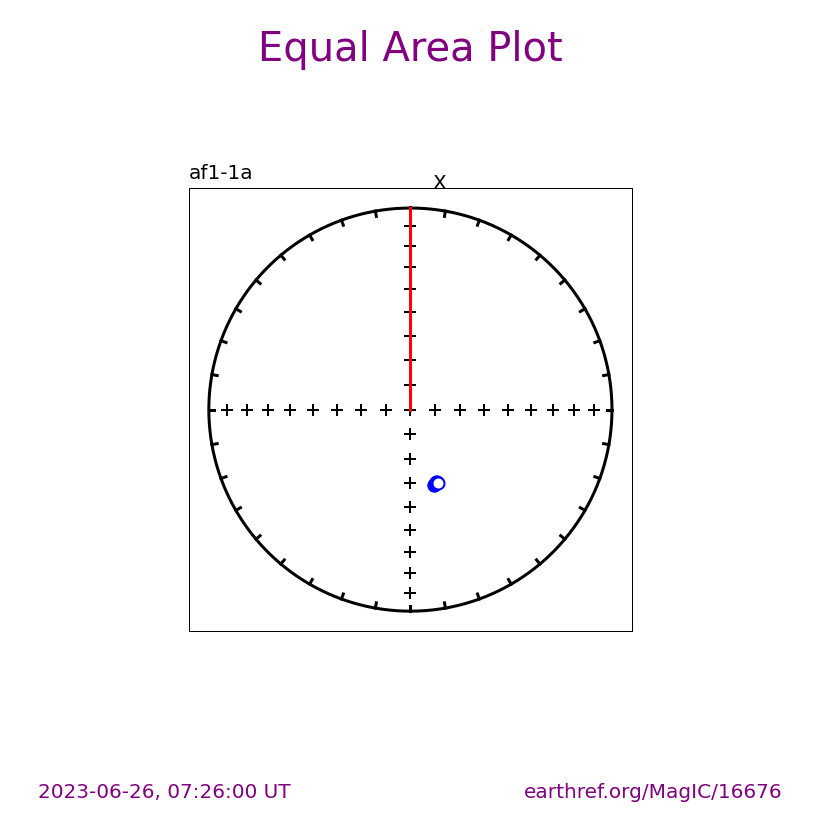

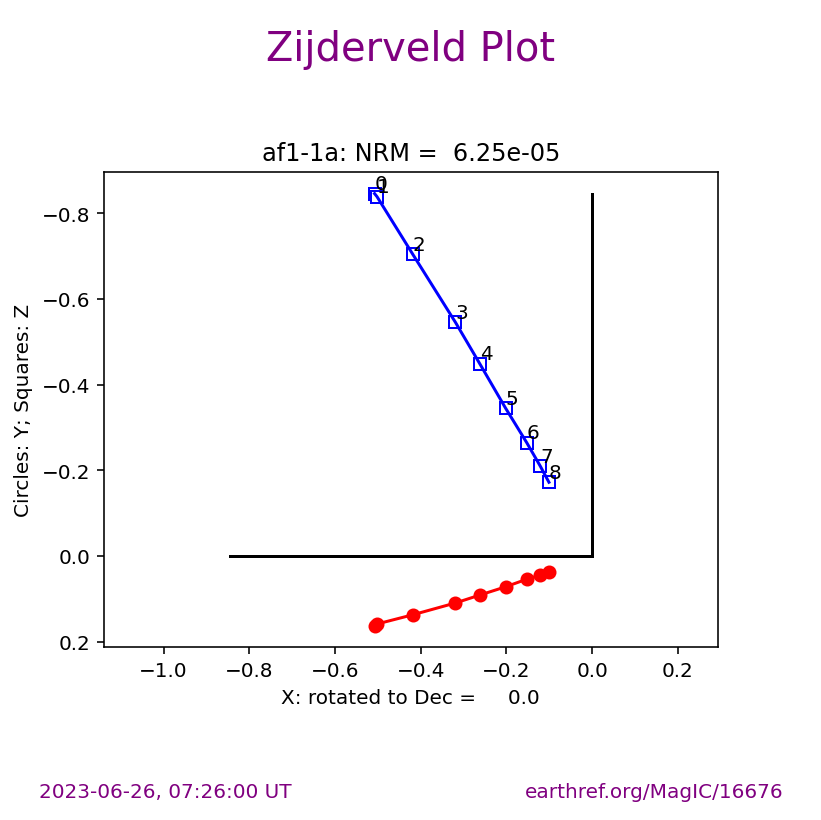

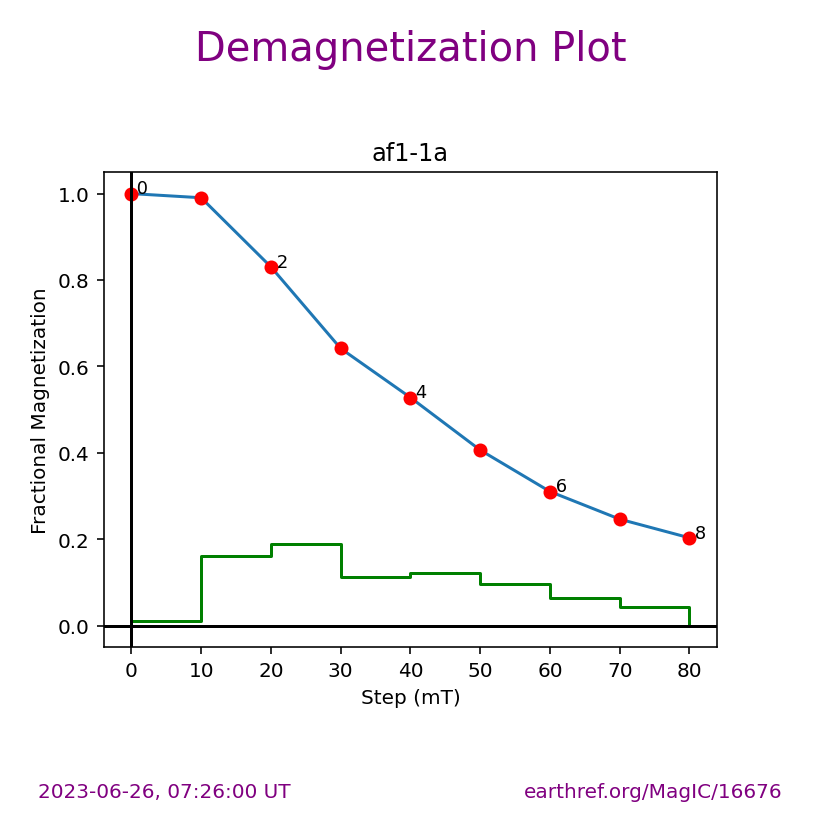

In [5]:
ipmag.zeq_magic(save_plots=False,
                n_plots=1)

## Visualizing site level data

Plots can also be saved by setting `save_plots` to be `True`

In [7]:
ipmag.eqarea_magic(save_plots=True)

-W- File /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/criteria.txt is incomplete and will be ignored
91  sites records read in
1  saved in  LO:_Golan-Heights_SI:__SA:__SP:__CO:_g_TY:_eqarea_.svg


(True, ['LO:_Golan-Heights_SI:__SA:__SP:__CO:_g_TY:_eqarea_.svg'])

-W- File /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/criteria.txt is incomplete and will be ignored


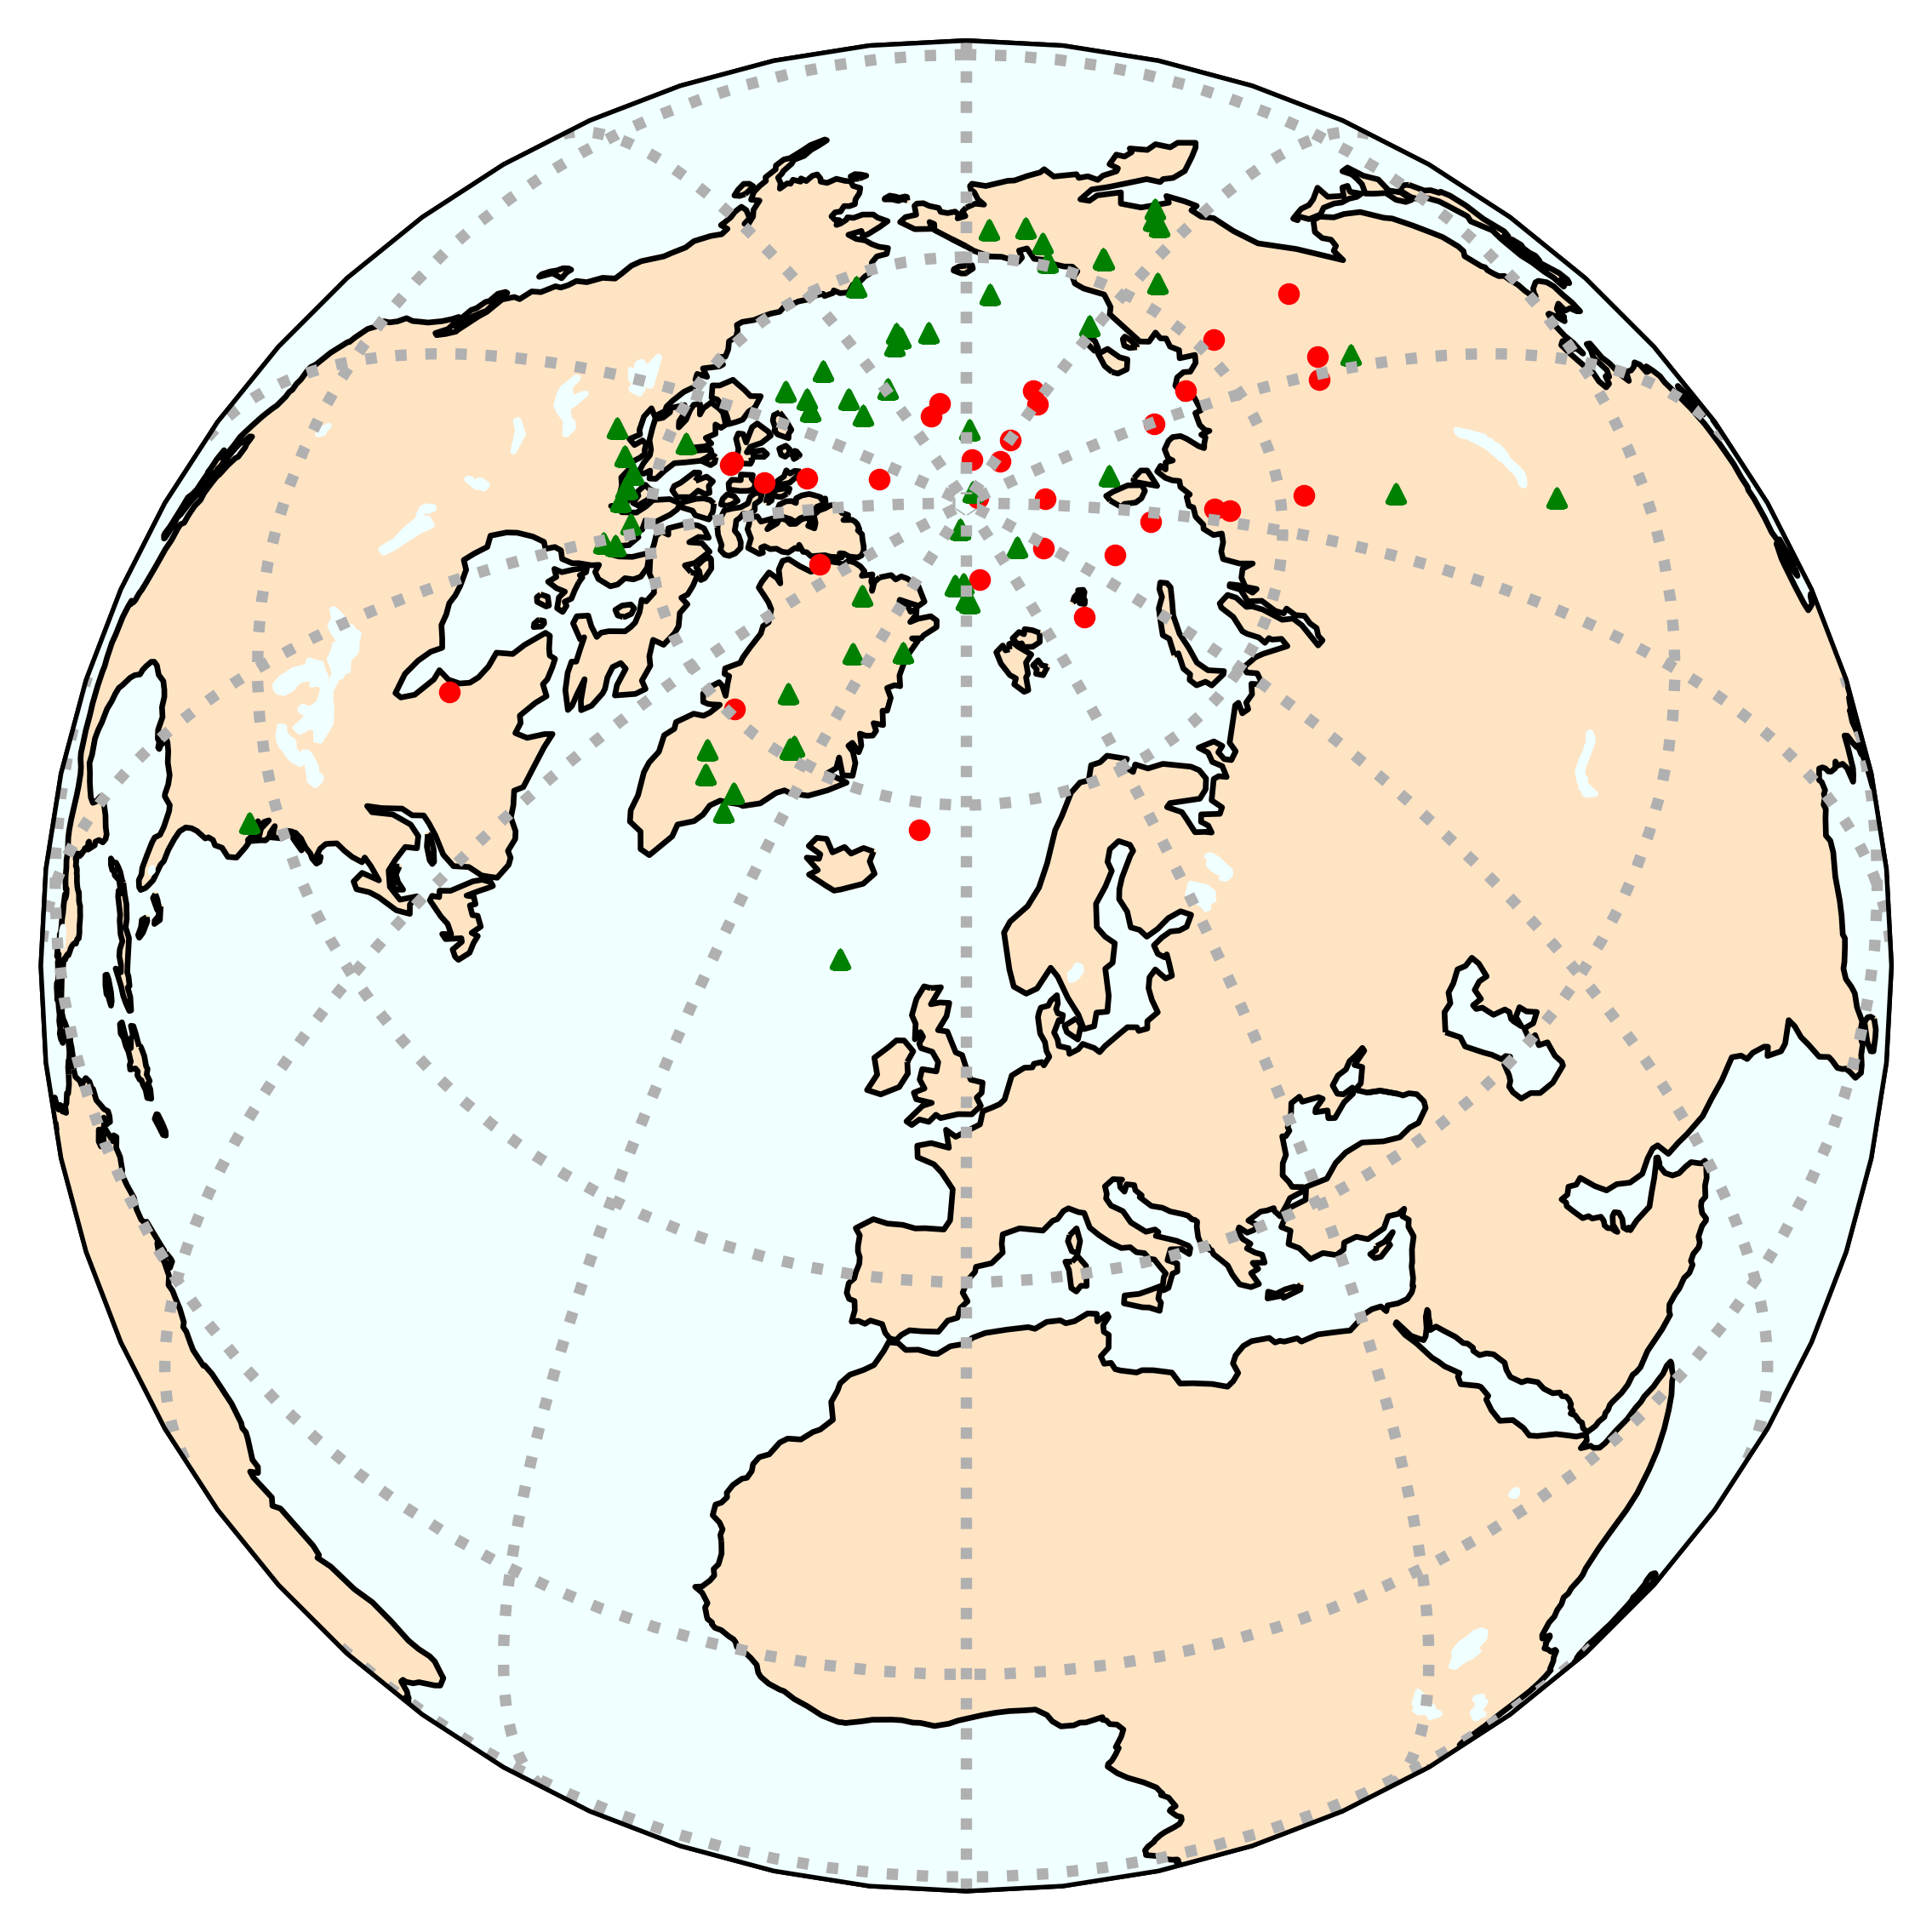

1  saved in  MC:_16676_TY:_VGP_map.pdf


(True, dict_values(['MC:_16676_TY:_VGP_map.pdf']))

In [9]:
ipmag.vgpmap_magic(flip=True,
                   save_plots=False,
                   lat_0=60)

## Importing specific MagIC tables

The functions above `ipmag.zeq_magic`, `ipmag.eqarea_magic`, and `ipmag.vgpmap_magic` are convenience functions that are able to directly read from MagIC files. For some other functions in `PmagPy` data need to be imported to be Python objects. There is a really nice package for dealing with tabular data in Python called `pandas`. The code cell below imports this package so that we can use it. We use the typical scientific Python nomenclature of importing it for use to the shorthand `pd`.

In [10]:
import pandas as pd

### Import the sites table

We can now use pandas to import the sites table to a pandas dataframe using the function `pd.read_csv()`.

In [11]:
sites = pd.read_csv('sites.txt',sep='\t',header=1)
sites

,age,age_high,age_low,age_unit,citations,criteria,dir_alpha95,dir_comp_name,dir_dec,dir_inc,...,result_quality,result_type,samples,site,software_packages,specimens,vgp_dm,vgp_dp,vgp_lat,vgp_lon
0,0.6798,0.6798,0.6798,Ma,This study,ACCEPT,4.7,Fit 1,350.0,37.2,...,g,i,GH01A:GH01B:GH01C:GH01D:GH01H:GH01M,GH01,pmagpy-3.16.0: demag_gui.v.3.0,GH01A1:GH01B1:GH01B2:GH01C1:GH01D1:GH01H1:GH01M1,5.5,3.2,74.8,254.1
1,1.3500,2.6000,0.1000,Ma,This study,ACCEPT,2.3,Fit 1,349.7,37.2,...,g,i,GH02A:GH02C:GH02D:GH02E:GH02F:GH02G,GH02,pmagpy-3.16.0: demag_gui.v.3.0,GH02A1:GH02C1:GH02D1:GH02E1:GH02E2:GH02F1:GH02...,2.7,1.6,74.7,255.0
2,1.1115,1.1115,1.1115,Ma,This study,ACCEPT,2.3,Fit 1,157.0,-56.9,...,g,i,GH03A:GH03B:GH03C:GH03D:GH03E:GH03G:GH03H,GH03,pmagpy-3.16.0: demag_gui.v.3.0,GH03A1:GH03B1:GH03C1:GH03C2:GH03D1:GH03E1:GH03...,3.3,2.4,-70.8,145.5
3,1.3500,2.6000,0.1000,Ma,This study,ACCEPT,2.1,Fit 1,175.1,-58.0,...,g,i,GH04A:GH04B:GH04C:GH04D:GH04E:GH04F:GH04G:GH04H,GH04,pmagpy-3.16.0: demag_gui.v.3.0,GH04A1:GH04B1:GH04C1:GH04D1:GH04E1:GH04E2:GH04...,3.1,2.3,-83.1,181.8
4,1.1196,1.1196,1.1196,Ma,This study,ACCEPT,2.8,Fit 1,181.0,-56.8,...,g,i,GH05A:GH05B:GH05D:GH05G:GH05H:GH05I:GH05K:GH05L,GH05,pmagpy-3.16.0: demag_gui.v.3.0,GH05A1:GH05B1:GH05D1:GH05G1:GH05H1:GH05H2:GH05...,4.1,2.9,-85.6,226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,4.7200,5.5300,3.9000,Ma,This study,ACCEPT,8.9,Fit 1,178.3,-53.6,...,g,i,ns2-12:ns2-8,ns2,pmagpy-3.16.0: demag_gui.v.3.0,ns2-12a:ns2-8a,12.4,8.7,-88.1,168.6
87,4.7200,5.5300,3.9000,Ma,This study,ACCEPT,2.0,Fit 1,162.4,-33.9,...,g,i,ns3-13:ns3-14:ns3-15:ns3-16:ns3-17:ns3-18,ns3,pmagpy-3.16.0: demag_gui.v.3.0,ns3-13a:ns3-14a:ns3-15a:ns3-16a:ns3-17a:ns3-18a,2.3,1.3,-68.7,87.9
88,4.7200,5.5300,3.9000,Ma,This study,ACCEPT,2.9,Fit 1,165.7,-27.3,...,g,i,ns4-19:ns4-20:ns4-21:ns4-22:ns4-23:ns4-24,ns4,pmagpy-3.16.0: demag_gui.v.3.0,ns4-19a:ns4-20a:ns4-21a:ns4-22a:ns4-23a:ns4-24a,3.2,1.7,-67.5,74.4
89,4.7200,5.5300,3.9000,Ma,This study,ACCEPT,4.7,Fit 1,166.8,-23.6,...,g,i,ns5-25:ns5-26:ns5-27:ns5-28:ns5-29:ns5-30,ns5,pmagpy-3.16.0: demag_gui.v.3.0,ns5-25a:ns5-26a:ns5-27a:ns5-28a:ns5-29a:ns5-30a,5.0,2.7,-66.2,69.3


We can extract specific columns from the dataframe by using the nomenclature `dataframe_name['column_name']`. In this case, the dataframe name is `sites` and the column name might be `dir_dec`. So `sites['dir_dec']` will give us  all the declinations.

In [12]:
sites_dec = sites['dir_dec']
sites_inc = sites['dir_inc']

## Pick a MagIC contribution to inspect yourself

Browse through some MagIC contributions and import the data to inspect them for yourself.

You can copy code from cells above and put them in the cells below.